In [29]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn
import matplotlib.pyplot as plt
df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [31]:
df1 = df.replace('C-', 'C')
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [32]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [33]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [34]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,1.0,0,0,0,0,0,1,0,0,0
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,3.3,0,0,1,0,0,0,0,0,0
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,2.4,0,0,0,0,0,0,0,1,0
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,1.4,0,0,0,0,0,1,0,0,0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,2.4,0,0,0,1,0,0,0,0,0


In [35]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PG-SG,SF,SF-PF,SG,SG-PG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0,1,0,0,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0,0,0,0,0,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0,0,0,1,0,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0,1,0,0,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0,0,0,0,0,2.8,3.7,1.5,0.2,10.9


In [36]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PG-SG,SF,SF-PF,SG,SG-PG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.955850,-2.020703,-3.646145,-2.497687,-2.461782,-0.151070,-1.970182,-2.108545,-0.023784,-1.020939,...,-0.048113,2.158734,-0.034001,-0.603141,-0.048113,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,0.910467,1.444038,0.807100,0.681855,0.003288,1.686033,1.392592,0.987808,1.351905,-1.152194,...,-0.048113,-0.463235,-0.034001,-0.603141,-0.048113,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-2.081130,-1.991341,-2.705589,-2.724797,-2.635379,-0.561297,-2.048386,-2.108545,-0.818195,-1.283449,...,-0.048113,-0.463235,-0.034001,1.657986,-0.048113,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,0.526225,0.122738,0.883880,-1.967763,-1.559081,-1.916829,-1.500958,-1.217813,-2.097005,-0.889684,...,-0.048113,2.158734,-0.034001,-0.603141,-0.048113,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,-0.681392,-1.110475,0.480784,0.908965,0.940708,-0.115398,0.532347,0.521234,0.228103,0.685375,...,-0.048113,-0.463235,-0.034001,-0.603141,-0.048113,0.300651,2.019853,2.833971,-0.163927,1.563782


In [38]:
df3 = df1[0:559]
df4 = df1[559:]

In [39]:
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PG-SG,SF,SF-PF,SG,SG-PG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,0.443887,1.091691,0.941465,1.893109,2.190603,-0.596969,1.236184,1.624045,-0.798820,1.341650,...,-0.048113,-0.463235,-0.034001,1.657986,-0.048113,-0.578758,-0.350648,-0.166964,-0.501126,0.092216
Ben McLemore,-1.587105,-1.022388,0.807100,0.757558,0.489358,0.401844,-0.015081,-0.242250,0.809380,1.341650,...,-0.048113,-0.463235,-0.034001,1.657986,-0.048113,0.359278,-0.113598,0.105849,-0.163927,1.011944
Gal Mekel,-0.900959,-1.227924,-1.169987,-1.664950,-1.281326,-1.667126,-1.657366,-1.557140,-1.263841,-0.233409,...,-0.048113,-0.463235,-0.034001,-0.603141,-0.048113,-0.813267,0.676569,-0.985400,-0.838324,-0.669845
Shabazz Muhammad,-1.724334,-1.198561,0.538369,1.438889,1.704533,-0.525625,1.314388,1.793708,-0.934451,0.422865,...,-0.048113,-0.463235,-0.034001,1.657986,-0.048113,-0.520130,-0.745732,-0.712588,-0.838324,-0.275676
Erik Murphy,1.130033,-0.112160,-1.861008,-1.135026,-1.281326,0.740727,-1.188141,-1.429892,1.177522,0.160355,...,-0.048113,-0.463235,-0.034001,-0.603141,-0.048113,-1.165030,-0.824748,-1.258213,-0.163927,-1.221683


In [40]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [41]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [42]:
test_y.tail()

,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,
Scotty Hopson,-0.508681,0.105849,-0.838324,-1.169127
Robbie Hummel,-0.587698,-0.439776,-0.838324,-0.407066
Ryan Kelly,0.360502,0.105849,1.859266,0.801721
Shane Larkin,0.281486,0.105849,-0.838324,-0.564734
Alex Len,-0.824748,-0.985400,0.510471,-0.774957


AxesSubplot(0.127273,0.125;0.617727x0.755)


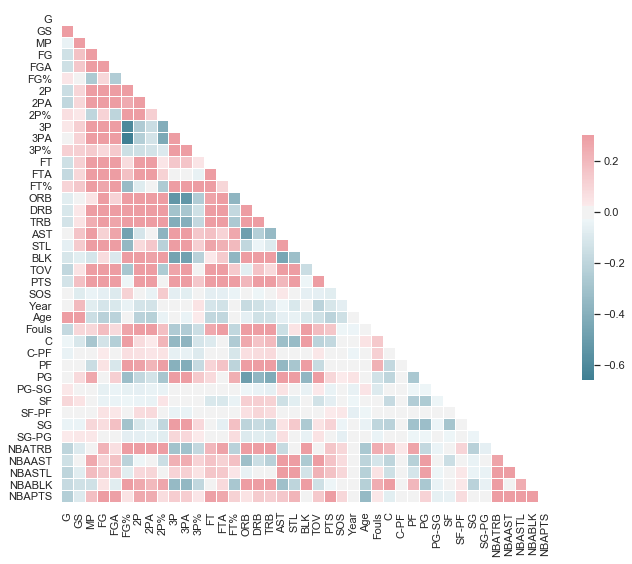

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True False  True False  True  True  True  True False  True False
  True]
[1 5 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 2 1 1 3 1 8 1 1 1 1 4 1 7 1]


In [45]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([1.52133100e-02, 1.06486265e-02, 8.53726930e-03, 2.39431980e-02,
       2.13363255e-02, 9.29737010e-03, 8.83420568e-03, 1.03972942e-02,
       7.63746001e-03, 2.88418383e-02, 2.37774751e-02, 1.05994356e-02,
       1.54470768e-02, 1.43051633e-02, 1.38960497e-02, 1.66458980e-02,
       1.72024437e-02, 1.50014941e-02, 2.07385413e-02, 1.68022101e-02,
       1.05166129e-02, 1.03155766e-02, 2.94029714e-02, 7.70268801e-03,
       8.21702542e-03, 4.12931011e-02, 8.76328099e-03, 3.38710823e-03,
       1.37428619e-05, 1.30119194e-02, 4.53726880e-02, 3.91987288e-04,
       5.52880604e-03, 7.51243456e-04, 2.73706830e-02, 3.20945232e-04,
       4.78536935e-01])

In [46]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,37):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

AttributeError: 'ExtraTreesRegressor' object has no attribute 'support_'

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

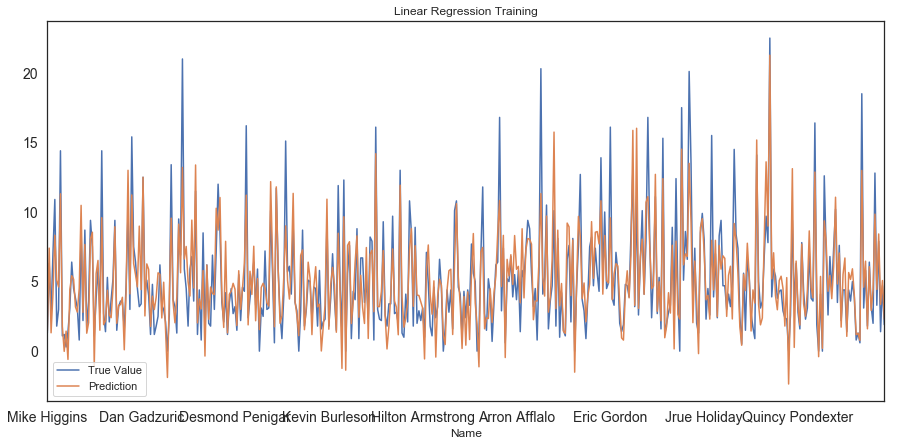

adj train r^2 = 0.7185635049857217
train mse = 3.9531767418271886


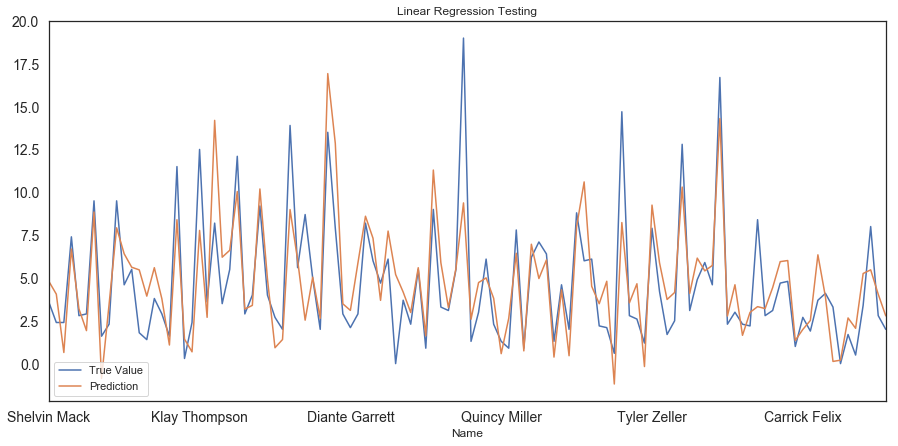

adj test r^2 = 0.5742905462263646
test mse = 5.258224040899327


In [48]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

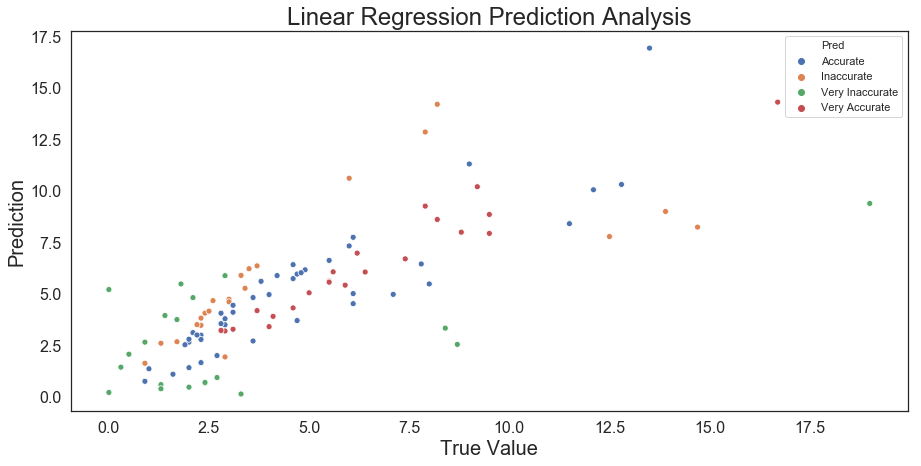

This model is able to relatively accurately predict 39.45% of NBA Rookies.
This model is able to very accurately predict 22.02% of NBA Rookies.


In [49]:
import seaborn as sns
test_y2 = test_y2[test_y2['prediction'] > 0]
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

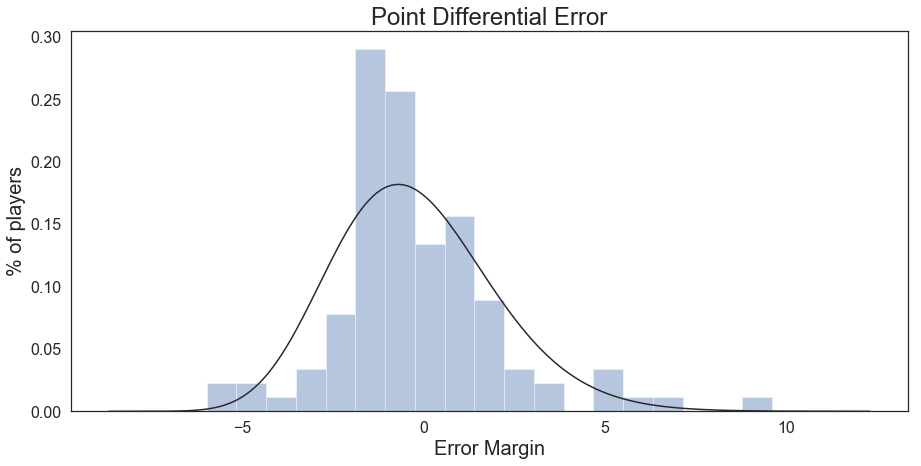

This model is able to relatively accurately predict 74.31% of NBA Rookies within 2 points.


In [50]:
from scipy import stats
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [51]:
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 67.01


In [52]:
webdata = pd.DataFrame(test_y2['NBAPTS'].values, columns=['Real'])
webdata['pred1'] = test_y2['prediction'].values
webdata['hue1'] = test_y2['Pred'].values
webdata['chip1'] = test_y2['chip'].values

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

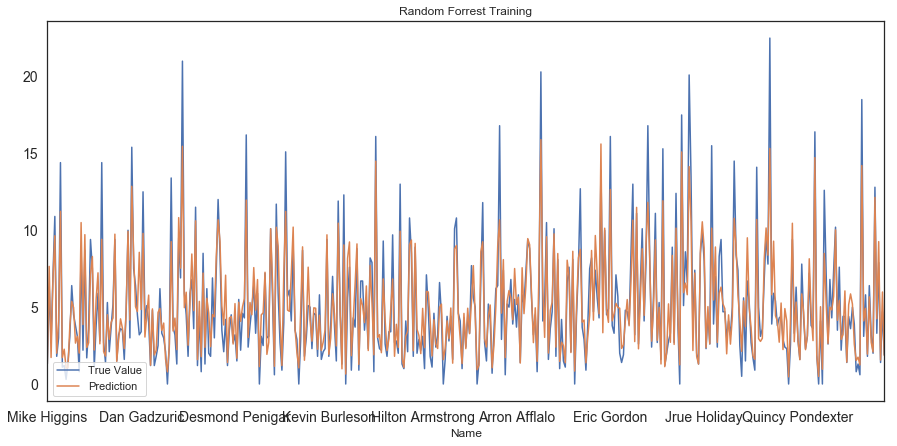

adj train r^2 = 0.8290986553605812
train mse = 2.4005529941710906


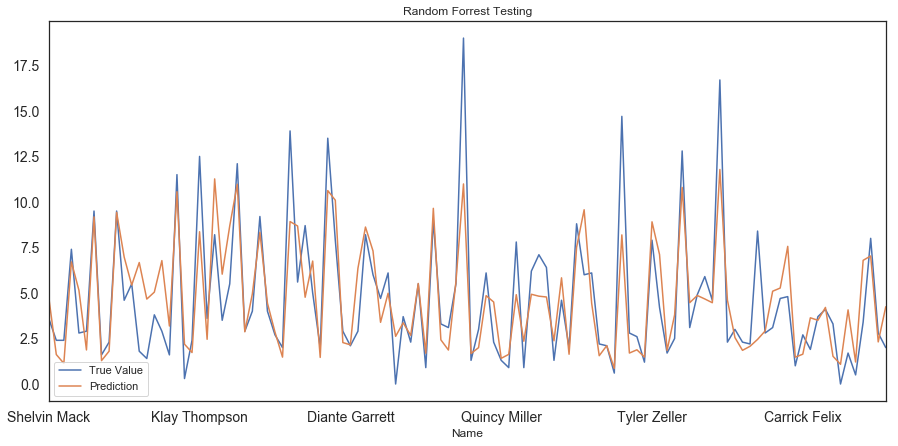

adj test r^2 = 0.6370501409970415
test mse = 4.4830380376405214


In [54]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))